# Estimación de Costos de Proyectos de Construcción

### Integrantes:
* Santiago Padilla Arias
* Mauricio López Coronado
* Jose Manuel Orozco Martínez 


### Objetivos:

>  - 1-.Implementar distribuciones de probabilidad para modelar la variabilidad de los costos principales del proyecto (materiales, mano de obra,equipo,etc.).
>  - 2-.Simular múltiples escenarios mediante distribuciones de probabilidad para obtener una distribución del costo total del proyecto.
>  - 3-.Determinar la probabilidad de que el costo total se mantenga dentro de un presupuesto específico

### Objetivo general:


>  -  1-.**Estimar el costo total de un proyecto de construcción**, considerando la incertidumbre en las principales variables mediante la simulación Monte Carlo, con el fin de apoyar la toma de decisiones financieras y estratégicas.

### Objetivo especificos:

 **Implementar una simulación para modelar la variabilidad de los costos principales del proyecto (materiales, mano de obra, equipo, etc.).**

>   Descripción:
>  -  Identificar los componentes clave del costo (ej. cemento, acero, trabajadores, alquiler de maquinaria)
>  -  Establecer el número de iteraciones necesario para garantizar la precisión del modelo (por lo general, más de 10,000 simulaciones).
>  -  Implementar el código de la simulación Monte Carlo en Python para generar escenarios aleatorios de costos.

**Simular múltiples escenarios para obtener una distribución del costo total del proyecto:**
>  - Ejecutar el modelo con las variables definidas en el objetivo anterior, generando una amplia gama de escenarios posibles.
>  - Calcular el costo total del proyecto en cada simulación, sumando los costos de materiales, mano de obra, equipo, y otros.
>  - Recopilar los resultados en una distribución del costo total, visualizando la frecuencia con la que se repiten ciertos valores de costo.
>  -Utilizar herramientas gráficas, como histogramas o curvas de distribución, para facilitar la interpretación del comportamiento de los costos.

**Determinar la probabilidad de que el costo total se mantenga dentro de un presupuesto específico, previamente definido.**
>  - Comparar los resultados obtenidos con el presupuesto definido por el proyecto ( 5 millones de MXN). 
>  - Calcular la probabilidad de que los costos simulados no excedan el presupuesto utilizando simulaciones.
>  - Determinar si se necesita ajustar el presupuesto o definir medidas de contingencia en caso de que exista un alto riesgo de sobrecostos.
>  -Presentar los resultados mediante gráficas de probabilidad acumulada, indicando con claridad la probabilidad de mantener los costos dentro del presupuesto.


## Proyecto a realizar:
### **Colado de una vialidad en una zona urbana**

El colado de una vialidad en una zona urbana se refiere al proceso de construcción de la superficie de una calle, avenida o camino mediante la aplicación de concreto fresco (u hormigón) sobre el terreno preparado. Este proceso es fundamental para garantizar una superficie de rodamiento adecuada y resistente para vehículos y peatones en áreas urbanas. 


### **Identifiacion costos:**

  **Acero estructural:**
  
  *  $A_E \sim N(18000, 33000)$

  **Concreto premezclado:**
  
 * Arena:
 * $P_A \sim U(1850, 2200)$
 * Grava:
 * $P_G \sim U(1850, 2200)$

 **Mano de obra: Obreros, ingenieros y supervisores.**

* Obrero: 
* $M_O \sim N(200, 20)$
* Supervisores: 
* $M_S \sim N(1300, 100)$
* Ingenieros: 
* $M_I \sim N(2200, 300)$ 

 **Equipos:** 

* Camiones de volteo:
* $C_V \sim N(2000, 200) $
* Retroexcavadores:
* $E_R \sim N(4000, 200) $
* Compactadora:
* $E_C \sim N(4000, 200) $
  
 **Mano de obra: Obreros, ingenieros y supervisores.**

 Los costos por retrasos asociados representan entre un $5$% y un $10$% del costo total del proyecto

**Gastos imprevistos:** 
Día por día simulando
    np.random.choice([0, 1], p=[0.95, 0.05])
    si pasa un imprevisto ese día no cuenta para el total de la construcción
Retrasos por mal clima, permisos o errores cosntructivos

Los costos por retrasos asociados representan entre un $5$% y un $10$% del costo total del proyecto

**Tiempo promedio esperado para la elaboración del colado**

4-6 meses

**Longitud total:**
500 metros


**Espesor:**

.30 m concreto

.50 m grava

1 m arena

**Ancho:**

3.5 metros

**Volumenes:**

Concreto: 525 m3

Arena: 1750 m3

Grava: 875 m3

## Deducción del Modelo:

### Funcion:
**Costos totales del proyecto:**
$$ Costos totales = materiales + mano de obra + maquinaria + imprevistos $$

**Costos de Materiales:**
$$Materiales = acero + concreto + grava + tepetate$$

**Costos de mano de obra:**
$$Mano de obra = (obrero + supervisor + ingeniero) * dias trabajados$$

**Costo de equipos:**
$$ Suma total de la maquinaria = compactadora + retro + camion de volteo  $$

**Gastos imprevistos:**
$$ Costo final = costo total del proyecto * imprevistos $$

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

n = 10000
# n = 10000000

# Rango de precios de los materiales
precioacero = np.random.normal(18000, 33000, n)
precioconcreto = np.random.uniform(1850, 2200, n)
preciograva = np.random.uniform(1150, 1500, n)
precioarena = np.random.uniform(500, 600, n)

#Rango de precios de los trabajadores
obrero = np.random.normal(200, 20) 
supervisor = np.random.normal(1300, 100) 
ing = np.random.normal(2200, 300) 

#Rango de precios de maquinaria
camiones = np.random.normal(2000, 200) 
retro = np.random.normal(3500, 200) 
compactadora = np.random.normal(2250, 200) 

# Consideren scrap
# Material total U(95%, 115%)
kgacero= np.random.uniform(600*.95, 600*1.15, n)
m3concreto= np.random.uniform(525*.95, 600*1.15, n)
m3grava= np.random.uniform(1725*.95, 1725*1.15, n)
m3arena= np.random.uniform(875*.95, 875*1.15, n)



In [ ]:
# Duración del colado
# cambiar por caminata aleatoria

def duración():
    np.random.choice([0, 1], p=[0.95, 0.05])


#duracionproyecto = np.random.randint(4, 7, n)  # Duración en meses
#dias = duracionproyecto * 30 #promedio 30 dias 


####### COSTO FINAL RESULTA DE PRECIOS COTIZADOS * DÍAS SIMULADOS CON IMPREVISTOS costomo = (obrero + supervisor + ing) * dias




costomaq = (camiones + retro + compactadora) * dias


# Cálculo de costos totales
costotot = (precioacero*kgacero + precioconcreto*m3concreto + preciograva*m3grava + precioarena*m3arena + costomo + costomaq)

# Cálculo de gastos imprevistos
imprevistos = costotot * np.random.uniform(0.05, 0.15, n)
costofinal = costotot + imprevistos


# Probabilidad de estar dentro del presupuesto
prob = np.mean(costofinal <= presupuesto)
print(f'La probabilidad de que el proyecto entre en el presupuesto es: {prob * 100:.2f}%')

In [36]:
# Análisis estadístico
promcostofinal = np.mean(costofinal)
desvestcostofinal = np.std(costofinal)

print("Simulacion de los costos totales:")
print(promcostofinal)
print(desvestcostofinal)                                                                              
simulaciones_df = pd.DataFrame(costofinal)
simulaciones_df

Simulacion de los costos totales:
4335053.74574074
240212.7773122163


,0
0,4.607028e+06
1,4.069661e+06
2,4.251711e+06
3,4.176911e+06
4,4.346295e+06
...,...
9995,4.785473e+06
9996,4.348093e+06
9997,4.651206e+06
9998,3.932691e+06


##### ¿Qué situación representa el modelo?

#### ¿Cuáles son las limitaciones fundamentales?

### Visualización de la solución del problema:

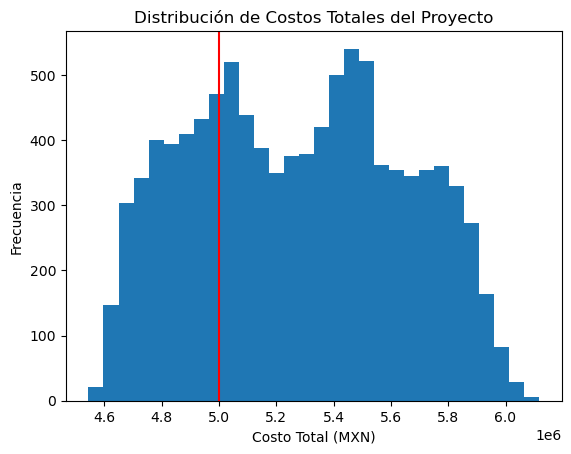

In [53]:

plt.hist(costofinal, bins=30)
plt.axvline(presupuesto, color='r', )
plt.title('Distribución de Costos Totales del Proyecto')
plt.xlabel('Costo Total (MXN)')
plt.ylabel('Frecuencia')
plt.show()

### ¿Condujo el algoritmo a una solución factible?

### Conclusiones:

### Referencias:

Viga IPR precios. (2018, mayo 16). Acerolaminados. https://acerolaminados.com.mx/viga-ipr-precios/   

Precio Unitario de Concreto Premezclado y Hecho en Obra. (2024, marzo 1).https://preciosunitariosconstruccion.com/basicos/concreto/#google_vignette

Solano, G. (2024, mayo 3). ¿Cuánto gana un albañil por día en México? El Informador :: Noticias de Jalisco, México, Deportes & Entretenimiento. https://www.informador.mx/mexico/Cuanto-gana-un-albanil-por-dia-en-Mexico-20240503-0051.html

(S/f). Gruasyequiposgarcia.com. Recuperado el 29 de octubre de 2024, de https://www.gruasyequiposgarcia.com/gruas-industriales/
Cotizaciones para Transporte de Mercancía de Contrucción. (s/f). Uship.com. Recuperado el 29 de octubre de 2024, de https://www.uship.com/mx/precio-de-env%C3%ADo/mercanc%C3%ADas-industriales-y-de-negocios-2/materiales-equipo-y-maquinaria-de-construcci%C3%B3n-22/


